# PREPROCESSING

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#pemanggilan data
data = pd.read_csv("Heart Prediction Quantum Dataset.csv")

In [36]:
data.head()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


Setiap baris dalam dataset mewakili satu pasien, dan kolom-kolomnya adalah atribut-atribut yang diamati pada pasien-pasien tersebut. Berikut adalah penjelasan dari setiap variabelnya:

Age: Usia seorang pasien.

Gender: Jenis kelamin seorang pasien.

BloodPressure: Tekanan darah pasien.

Cholesterol: Kadar kolesterol yang dimiliki pasien.

HeartRate: Besar detak jantung pasien.

QuantumPatternFeature: Fitur pola kuantum yang terkait dengan analisis pola sinyal jantung

Outcome: Variabel target atau label yang menunjukkan apakah pasien memiliki penyakit jantung atau tidak. Label ini umumnya bernilai 1 untuk kasus positif (pasien memiliki penyakit jantung) dan 0 untuk kasus negatif (pasien tidak memiliki penyakit jantung).

Dataset ini memberikan informasi penting tentang karakteristik klinis pasien dan dapat digunakan untuk memprediksi atau menganalisis faktor-faktor risiko yang terkait dengan penyakit jantung.

In [37]:
data.tail(5)

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
495,34,0,126,292,116,9.303403,0
496,41,0,164,248,114,9.067889,0
497,45,1,159,175,75,8.718708,0
498,55,0,107,157,101,7.337650,1
499,55,0,174,249,89,10.492950,0


In [38]:
#melihat statistika deskriptif
data.describe()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,54.864000,0.468000,132.874000,221.50000,88.766000,8.317407,0.600000
std,14.315004,0.499475,26.418516,43.86363,17.417289,0.919629,0.490389
min,30.000000,0.000000,90.000000,150.00000,60.000000,6.164692,0.000000
25%,43.000000,0.000000,111.000000,183.75000,73.000000,7.675779,0.000000
50%,55.000000,0.000000,132.000000,221.00000,89.000000,8.323064,1.000000
75%,66.250000,1.000000,155.000000,258.00000,104.000000,8.935999,1.000000
max,79.000000,1.000000,179.000000,299.00000,119.000000,10.784886,1.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int64  
 4   HeartRate              500 non-null    int64  
 5   QuantumPatternFeature  500 non-null    float64
 6   HeartDisease           500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 7 kolom. Kolom pada dataset tersebut memiliki dua tipe data, yaitu: integer dan float. Dengan demikian tidak perlu dilakukan Encoding Data. Jumlah maksimal baris untuk setiap kolom sebanyak:  500 baris. Seluruh kolom sudah memiliki jumlah baris = 500, maka tidak perlu dilakukan penanganan missing value.



**CEK OUTLIER**

**Cek Outlier**
Outlier dapat dideteksi menggunakan beberapa metode:

1. Boxplot → Visualisasi distribusi dan outlier
2. Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil

**1. Boxplot**

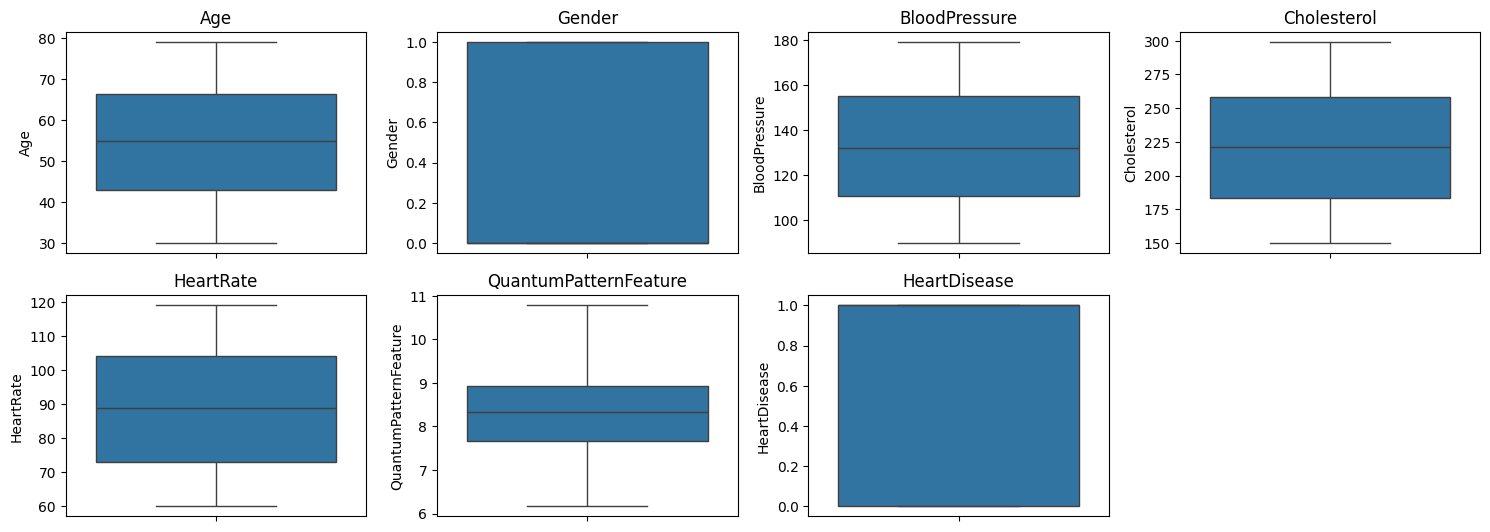

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Age', 'Gender', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature', 'HeartDisease']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


**2. IQR**

In [41]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")


Age: 0 outliers
Gender: 0 outliers
BloodPressure: 0 outliers
Cholesterol: 0 outliers
HeartRate: 0 outliers
QuantumPatternFeature: 0 outliers
HeartDisease: 0 outliers


Berdasarkan hasil di atas dapat dilihat bahwa data tidak memiliki outlier. Dengan demikian tidak perlu dilakukan penanganan outlier.

# K-NEAREST NEIGHBORS

**Splitting the dataset into the training set and test set**

Split dataset dilakukan untuk membagi dataset menjadi data training dan data testing. Data training adalah bagian dari dataset yang digunakan untuk melatih model dalam pembelajaran mesin. Data ini digunakan untuk mempelajari pola dan hubungan antara fitur (variabel independen) dan label atau target yang diinginkan (variabel dependen). Model belajar dari data training untuk mengidentifikasi pola-pola yang ada dan menyesuaikan parameter-parameter internalnya agar dapat membuat prediksi yang akurat pada data baru.

Sementara itu, data testing (atau data uji) merupakan bagian dari dataset yang digunakan untuk menguji kinerja model yang telah dilatih dengan data training. Data ini tidak digunakan dalam proses pelatihan dan digunakan untuk mengevaluasi seberapa baik model mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya. Data testing membantu mengukur seberapa baik model mampu memprediksi label atau output yang benar untuk data yang tidak pernah dilihat sebelumnya, membantu memastikan bahwa model tidak hanya mengingat data yang telah dilatih tapi juga mampu mengadopsi pola umum yang ditemui pada data baru.

besarnya pembagian data:

Pemisahan data training dan testing adalah keputusan yang penting dalam pembuatan model yang dapat diandalkan. Secara umum, tidak ada aturan baku tentang seberapa besar persentase data yang harus dialokasikan untuk training dan testing, namun terdapat praktik umum yang dapat dipertimbangkan:

Pemisahan Standar: Pembagian yang sering digunakan adalah 70-30 atau 80-20, di mana sekitar 70% atau 80% dari data digunakan untuk training dan sisa 30% atau 20% digunakan untuk testing. Ini bisa menjadi awal yang baik untuk banyak kasus.

Data yang Lebih Besar: Jika datasetnya besar, pemisahan seperti 90-10 atau bahkan 95-5 mungkin dapat dilakukan. Model dengan lebih banyak data training cenderung memiliki kinerja yang lebih baik, tetapi harus diingat bahwa kita ingin memiliki cukup data di testing untuk evaluasi yang akurat.

split dataset dengan ukuran 80:20

In [42]:
from sklearn.model_selection import train_test_split

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 500
Total # of sample in train dataset: 400
Total # of sample in test dataset: 100


In [44]:
print(X_train)

     Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature
249   49       0            144          194         80               8.436008
433   35       0            167          171         97               8.775431
19    73       0            111          294         98               8.982810
322   50       0             90          275         89               9.647824
332   51       1             98          207        115               8.175125
..   ...     ...            ...          ...        ...                    ...
106   40       0            159          295        101               8.766713
270   60       0            157          166        107               7.839496
348   62       0            106          228        106               8.207701
435   72       0            135          152         91               6.515717
102   30       1            122          221        108               8.291012

[400 rows x 6 columns]


In [45]:
print(y_train)

249    1
433    1
19     0
322    0
332    1
      ..
106    0
270    1
348    1
435    1
102    1
Name: HeartDisease, Length: 400, dtype: int64


In [46]:
print(X_test)

     Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature
361   35       1            118          275         69               9.851123
73    63       1            146          161        108               7.911579
374   52       0            152          213        109               9.974616
155   33       1             92          186         69               9.049142
104   37       1            111          231         73               8.616769
..   ...     ...            ...          ...        ...                    ...
347   76       0            123          157        101               6.164692
86    74       0            107          258         73               8.109975
75    65       1            175          229        115               7.996055
438   37       0            126          255        105               9.140306
15    32       1             94          247        119               9.322586

[100 rows x 6 columns]


In [47]:
print(y_test)

361    0
73     1
374    0
155    0
104    1
      ..
347    1
86     1
75     1
438    0
15     0
Name: HeartDisease, Length: 100, dtype: int64


**Feature Scaling**

Transformasi data dan Normalisasi data perlu dilakukan agar data dapat digunakan dalam algoritma KNN maupun Naive Bayes

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
print(X_train)

[[-0.4291123  -0.93228691  0.43176601 -0.65853779 -0.50719123  0.13822772]
 [-1.42456752 -0.93228691  1.30096673 -1.19068954  0.46872851  0.5226746 ]
 [ 1.27738235 -0.93228691 -0.81534807  1.65516547  0.52613555  0.75756147]
 ...
 [ 0.49523897 -0.93228691 -1.00430475  0.12812132  0.98539189 -0.12036412]
 [ 1.20627841 -0.93228691  0.09164399 -1.63029316  0.12428625 -2.03678869]
 [-1.78008724  1.07263117 -0.39964337 -0.03383791  1.10020598 -0.02600276]]


In [51]:
print(X_test.dtype)

float64


**Training the K-NN model on the Training set**

In [52]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i-x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[] #calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1]) #sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get fist k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neigbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions


In [53]:
model=KNN(5)
model.fit(X_train,y_train)

5


In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
model = []
model.append(('KNN', KNeighborsClassifier()))

**Prediksi KNN berdasarkan model yang dibangun**

Modelling dengan KNN

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#definisikan nilai K dan buat objek KNN regressor
k = 3
knn = KNeighborsRegressor(n_neighbors=k)

#fitkan model KNN ke data train
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [57]:
# Lakukan prediksi pada data train dan dataset
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [58]:
#Hitung MSE untuk data train dan data test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [59]:
print("MSE data train:", mse_train)
print("MSE data test:", mse_test)

MSE data train: 0.05861111111111113
MSE data test: 0.07777777777777777


Hasil Prediksi berdasarkan perhitungan Mean Squared Error

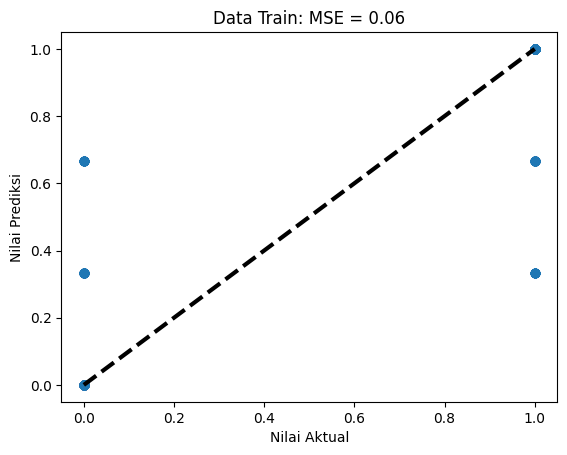

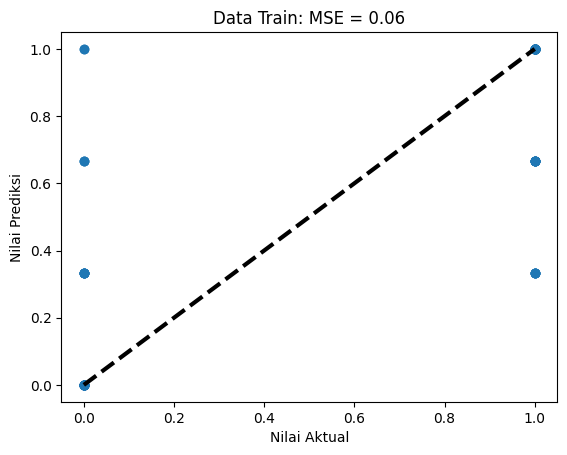

In [60]:
import matplotlib.pyplot as plt

# Plot data train
plt.scatter(y_train, y_pred_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

# Plot dataset
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

Kita akan menggunakan matplotlib untuk membuat scatter plot dari nilai aktual versus nilai prediksi untuk data train dan data test.
Garis diagonal yang ditampilkan pada grafik menggambarkan situasi ideal di mana nilai aktual dan prediksi sama. Jika model KNN berhasil memprediksi dengan baik, titik akan membentuk pola yang hampil lurus mengikuti garis diagonal. Jika nilai MSE rendah, artinya model memiliki tingkat akurasi yang baik

**Hasil evaluasi (nilai akurasi Algoritma KNN) dan Confusion Matriks**

In [61]:
y_pred = classifier.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[38  2]
 [ 5 55]]


0.93

In [63]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[38  2]
 [ 5 55]]


0.93

Nilai akurasi algoritma KNN adalah 93%

# NAIVE BAYES

In [64]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [65]:
# fit train set pakai Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [66]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.8975

In [67]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [68]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.9400


**Membuat model dengan Neural Network**

In [69]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

Tentukan Parameter yang Ingin diuji: parameters adalah kamus yang berisi parameter-parameter yang ingin diuji. Pada contoh ini, parameter yang diuji meliputi hidden_layer_sizes (berbagai kombinasi jumlah dan ukuran hidden layers), learning_rate_init (berbagai tingkat pembelajaran awal), dan max_iter (berbagai jumlah iterasi).

Inisialisasi Model: MLPClassifier() digunakan untuk membuat model Neural Network Multi-Layer Perceptron (MLP) dengan parameter default.

Untuk memastikan bahwa hasil dari GridSearchCV konsisten setiap kali dijalankan, kamu bisa menambahkan argumen random_state pada GridSearchCV dan MLPClassifier. Penggunaan random_state ini akan memastikan bahwa inisialisasi yang melibatkan keputusan acak (seperti pembagian data menjadi lipatan validasi silang atau inisialisasi parameter awal pada Neural Network) dilakukan secara konsisten dalam setiap percobaan.Penting untuk dicatat bahwa pilihan nilai random_state tidak harus spesifik pada angka 100; angka lainnya juga dapat digunakan, asalkan nilai random_state yang sama digunakan dalam kondisi yang sama untuk memastikan konsistensi hasil saat menjalankan kode yang menggunakan random state.

Inisialisasi GridSearchCV: GridSearchCV digunakan untuk melakukan pencarian parameter terbaik dengan memanfaatkan cross-validation. cv=5 menunjukkan bahwa validasi silang dilakukan dengan 5 lipatan (5-fold cross-validation).

Pencarian Grid pada Data Training: grid_search.fit(X, y) melakukan pencarian parameter terbaik dengan memanfaatkan data training (X adalah fitur-fitur, y adalah target/label).

GridSearchCV akan mengevaluasi semua kombinasi parameter yang mungkin dari parameters yang telah ditentukan dan akan melakukan pelatihan serta evaluasi model pada setiap kombinasi tersebut. Tujuan utamanya adalah untuk menemukan kombinasi parameter yang menghasilkan model dengan performa terbaik berdasarkan metrik evaluasi yang dipilih (misalnya, akurasi, presisi, atau recall).

Setelah proses pencarian selesai, parameter terbaik dapat diakses melalui atribut best_params_ dari objek grid_search. Atribut ini akan menampilkan kombinasi parameter terbaik yang diidentifikasi selama pencarian grid.

In [70]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 200}


In [71]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

Kode yang disediakan menggunakan MLPClassifier dari library Scikit-Learn untuk membuat model Neural Network berbasis Multi-Layer Perceptron (MLP) dengan parameter tertentu dan melatihnya pada data training.

Dalam kasus ini, model MLPClassifier dibuat dengan parameter-parameter tertentu yang telah ditentukan secara manual. Parameter-parameter ini adalah:

hidden_layer_sizes=(50,): Ini adalah tuple yang menunjukkan arsitektur dari jaringan saraf. (50,) berarti terdapat satu hidden layersberisi 50 neuron.

learning_rate_init=0.1: Parameter ini adalah tingkat pembelajaran awal. Ini menunjukkan seberapa besar model akan menyesuaikan bobotnya berdasarkan kesalahan pada setiap iterasi.

max_iter=100: Parameter ini menunjukkan jumlah maksimum iterasi yang akan dilakukan saat melatih model. Ini mengontrol seberapa banyak iterasi atau epoch yang akan dilakukan selama proses pelatihan.

In [72]:
y_pred = clf.predict(X_test)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       1.00      0.92      0.96        60

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.95      0.95       100



In [74]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.95

Output 0.95 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.95 berarti bahwa model berhasil memprediksi dengan benar sekitar 95% dari semua sampel pada data uji (y_test) yang telah digunakan.
Hasil ini melebihi akurasi yang ditunjukkan dengan menggunakan KNN yaitu 93%. Dengan demikian dalam kasus ini klasifikasi dengan menggunakan Naive Bayes lebih akurat daripada menggunakan KNN.